## Map of Oregon, housing project. GeoPandas

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon

%matplotlib inline

In [39]:
street_map = gpd.read_file('/Volumes/T7/Career/School/MSADSB/BTA 520/Metro_Boundary_Annexations/Metro_Boundary_Annexations.shp')

<Axes: >

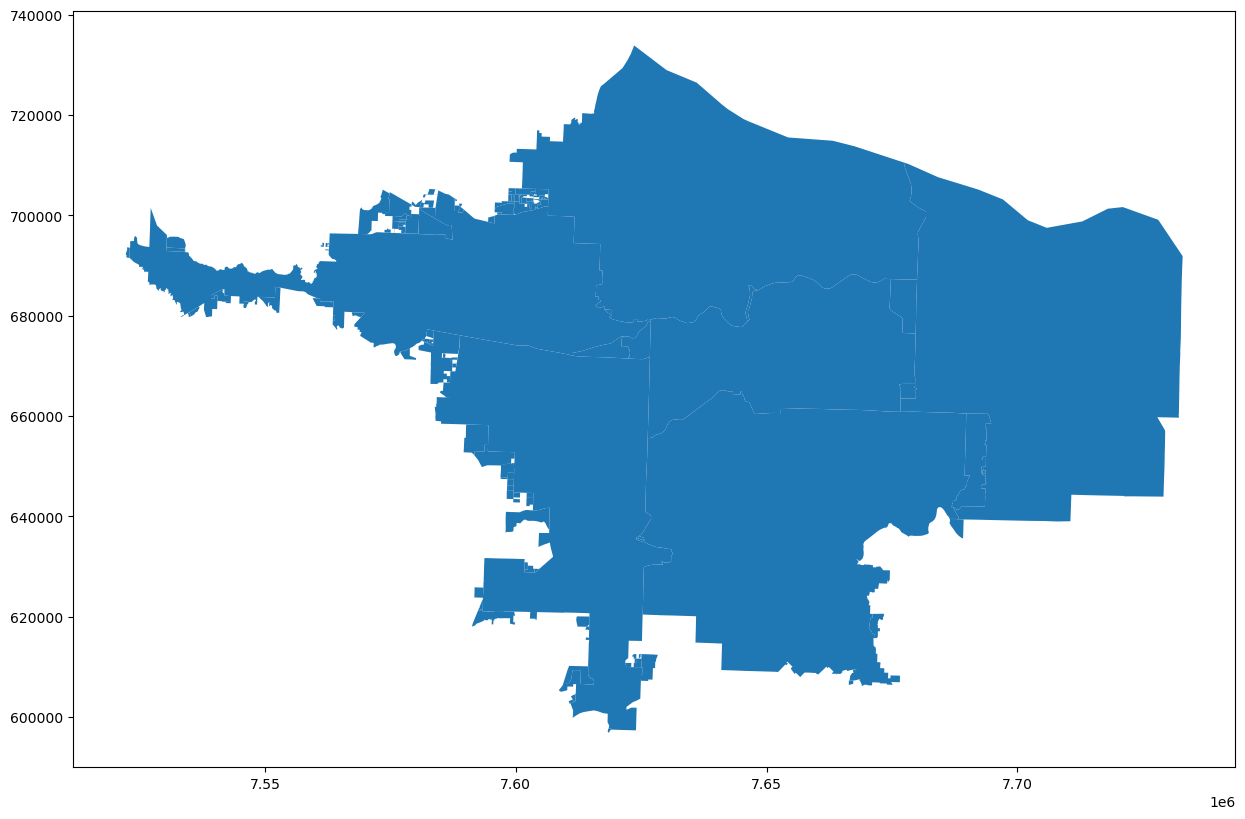

In [63]:
fig, ax = plt.subplots(figsize=(15,15))
street_map.plot(ax=ax)

In [51]:
data = pd.read_excel('/Volumes/T7/Career/School/MSADSB/BTA 520/housing_normal_long.xlsx')
crs = {'init':'epsg:4326'}
data.head()

,zipcode,price,lastSoldPrice,homeStatus,yearBuilt,bathrooms,bedrooms,daysOnZillow,zestimate,homeType,resoFacts/roofType,lastSoldPrice.1,livingArea,priceHistory/1/price,propertyTaxRate,cluster,latitude,longitude
0,97024,315400,315400,RECENTLY_SOLD,2007,3.0,3,25,317406,TOWNHOUSE,Shake / Shingle,315400,1806,212000,1.12,2,45.541734,-122.442071
1,97080,512000,512000,RECENTLY_SOLD,1982,3.0,4,11,512355,SINGLE_FAMILY,Composition,512000,2724,479000,1.12,1,49.804824,9.931819
2,97080,404200,404200,RECENTLY_SOLD,1967,2.0,3,14,397479,SINGLE_FAMILY,Composition,404200,1150,204500,1.12,2,49.804824,9.931819
3,97030,478200,478200,RECENTLY_SOLD,1978,2.0,3,25,481241,SINGLE_FAMILY,Other,478200,2036,265000,1.12,2,45.507415,-122.431300
4,97080,530000,530000,RECENTLY_SOLD,2018,2.0,4,26,532813,SINGLE_FAMILY,Composition,530000,1947,480000,1.12,2,49.804824,9.931819


In [58]:
#Convert lat and long to Points
geometry=gpd.points_from_xy(data.longitude, data.latitude)

#points_from_xy() is an enhanced wrapper for [Point(x, y) for x, y in zip(df.Longitude, df.Latitude)])

In [59]:
len(geometry)

20528

In [60]:
geo_df = gpd.GeoDataFrame(data, #specify our data
                          crs=crs, #specify our coordinate reference system
                          geometry=geometry) #specify the geometry list we created
geo_df.head()

/Users/jwitch/anaconda3/lib/python3.10/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


,zipcode,price,lastSoldPrice,homeStatus,yearBuilt,bathrooms,bedrooms,daysOnZillow,zestimate,homeType,resoFacts/roofType,lastSoldPrice.1,livingArea,priceHistory/1/price,propertyTaxRate,cluster,latitude,longitude,geometry
0,97024,315400,315400,RECENTLY_SOLD,2007,3.0,3,25,317406,TOWNHOUSE,Shake / Shingle,315400,1806,212000,1.12,2,45.541734,-122.442071,POINT (-122.44207 45.54173)
1,97080,512000,512000,RECENTLY_SOLD,1982,3.0,4,11,512355,SINGLE_FAMILY,Composition,512000,2724,479000,1.12,1,49.804824,9.931819,POINT (9.93182 49.80482)
2,97080,404200,404200,RECENTLY_SOLD,1967,2.0,3,14,397479,SINGLE_FAMILY,Composition,404200,1150,204500,1.12,2,49.804824,9.931819,POINT (9.93182 49.80482)
3,97030,478200,478200,RECENTLY_SOLD,1978,2.0,3,25,481241,SINGLE_FAMILY,Other,478200,2036,265000,1.12,2,45.507415,-122.431300,POINT (-122.43130 45.50742)
4,97080,530000,530000,RECENTLY_SOLD,2018,2.0,4,26,532813,SINGLE_FAMILY,Composition,530000,1947,480000,1.12,2,49.804824,9.931819,POINT (9.93182 49.80482)


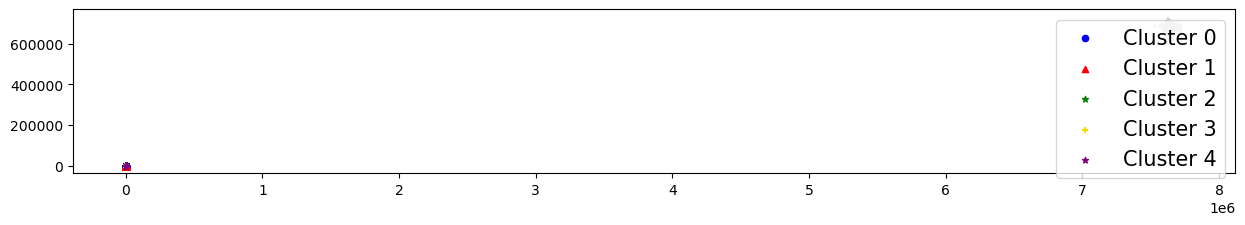

In [62]:
fig, ax = plt.subplots(figsize=(15,15))
street_map.plot(ax=ax, alpha=0.4, color='grey')
geo_df[geo_df['cluster'] == 0].plot(ax=ax, 
                                       markersize=20, 
                                       color='blue', 
                                       marker='o', 
                                       label='Cluster 0')
geo_df[geo_df['cluster'] == 1].plot(ax=ax, 
                                       markersize=20, 
                                       color='red', 
                                       marker='^', 
                                       label='Cluster 1')
geo_df[geo_df['cluster'] == 2].plot(ax=ax, 
                                       markersize=20, 
                                       color='green', 
                                       marker='*', 
                                       label='Cluster 2')
geo_df[geo_df['cluster'] == 3].plot(ax=ax, 
                                       markersize=20, 
                                       color='gold', 
                                       marker='+', 
                                       label='Cluster 3')
geo_df[geo_df['cluster'] == 4].plot(ax=ax, 
                                       markersize=20, 
                                       color='purple', 
                                       marker='*', 
                                       label='Cluster 4')
plt.legend(prop={'size':15})

In [64]:
print(sys.path)

NameError: name 'sys' is not defined